# Classification with Decision Trees

### Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import diabetes dataset
df_diabetes = pd.read_csv("diabetes.csv")

# view first lines of the dataset
df_diabetes.head()

#df_diabetes.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

#### Activity 1.        

* Split the data into training and test sets. To build the train and test sets, you can use the function `train_test_split` from the module `model_selection` of `scikit-learn`. Make sure that the test set corresponds to 1/10th of your data. For reproducibility, set `random_state` to some fixed value.


**Note:** Keep in mind that the test data should not be used for any design or validation decisions.

---

In [5]:
from sklearn.model_selection import train_test_split

X = df_diabetes.drop('Outcome',axis='columns')
y = df_diabetes['Outcome']

# Separa 90% para treino e 10% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

---

#### Activity 2.  

* Fit the decision tree classifier to the training set from Activity 1. The algorithm can be imported from the `sklearn.tree` library under the name `DecisionTreeClassifier`.

In [7]:
from sklearn.tree import DecisionTreeClassifier
# Inicializa o modelo Decision Tree Classifier com altura 2 (pode ser ajustado conforme necessário)
modelo_dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
modelo_dtc.fit(X_train, y_train)

# Faz previsões com o modelo Random Forest
y_pred_dtc = modelo_dtc.predict(X_test)

print(y_pred_dtc)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0]


#### Activity 3.  

* Print the training accuracy
* Print the test set accuracy
* Print the confusion matrix of the test set
* Print the test set precision
* Print the test set recall
* Print the test set f1 score

These algorithms to compute these metrics can be imported from the `sklearn.metrics`.

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Calcula a acurácia no conjunto de treino
train_accuracy = modelo_dtc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calcula a acurácia no conjunto de teste
test_accuracy = modelo_dtc.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Previsões no conjunto de teste
y_pred = modelo_dtc.predict(X_test)

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calcula a precisão no conjunto de teste
test_precision = precision_score(y_test, y_pred, average='weighted')
print("Test Precision:", test_precision)

# Calcula o recall no conjunto de teste
test_recall = recall_score(y_test, y_pred, average='weighted')
print("Test Recall:", test_recall)

# Calcula o F1 Score no conjunto de teste
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test F1 Score:", test_f1)


Training Accuracy: 0.7713458755426917
Test Accuracy: 0.7792207792207793
Confusion Matrix:
 [[43  7]
 [10 17]]
Test Precision: 0.775208282283754
Test Recall: 0.7792207792207793
Test F1 Score: 0.7759425040978438


### Activity 4.

Visualize a text representation of the learned Decision Tree. The decision tree can be visualized from the `sklearn.tree` library with the `export_text` method.

In [14]:
from sklearn.tree import export_text

# Exibe a árvore de decisão como texto
tree_text = export_text(modelo_dtc, feature_names=list(X_train.columns))
print(tree_text)


|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- class: 1



### Activity 5.

Plot the learned Decision Tree with matplotlib. The decision tree can be visualized from the `sklearn.tree` library with the `plot_tree` method.

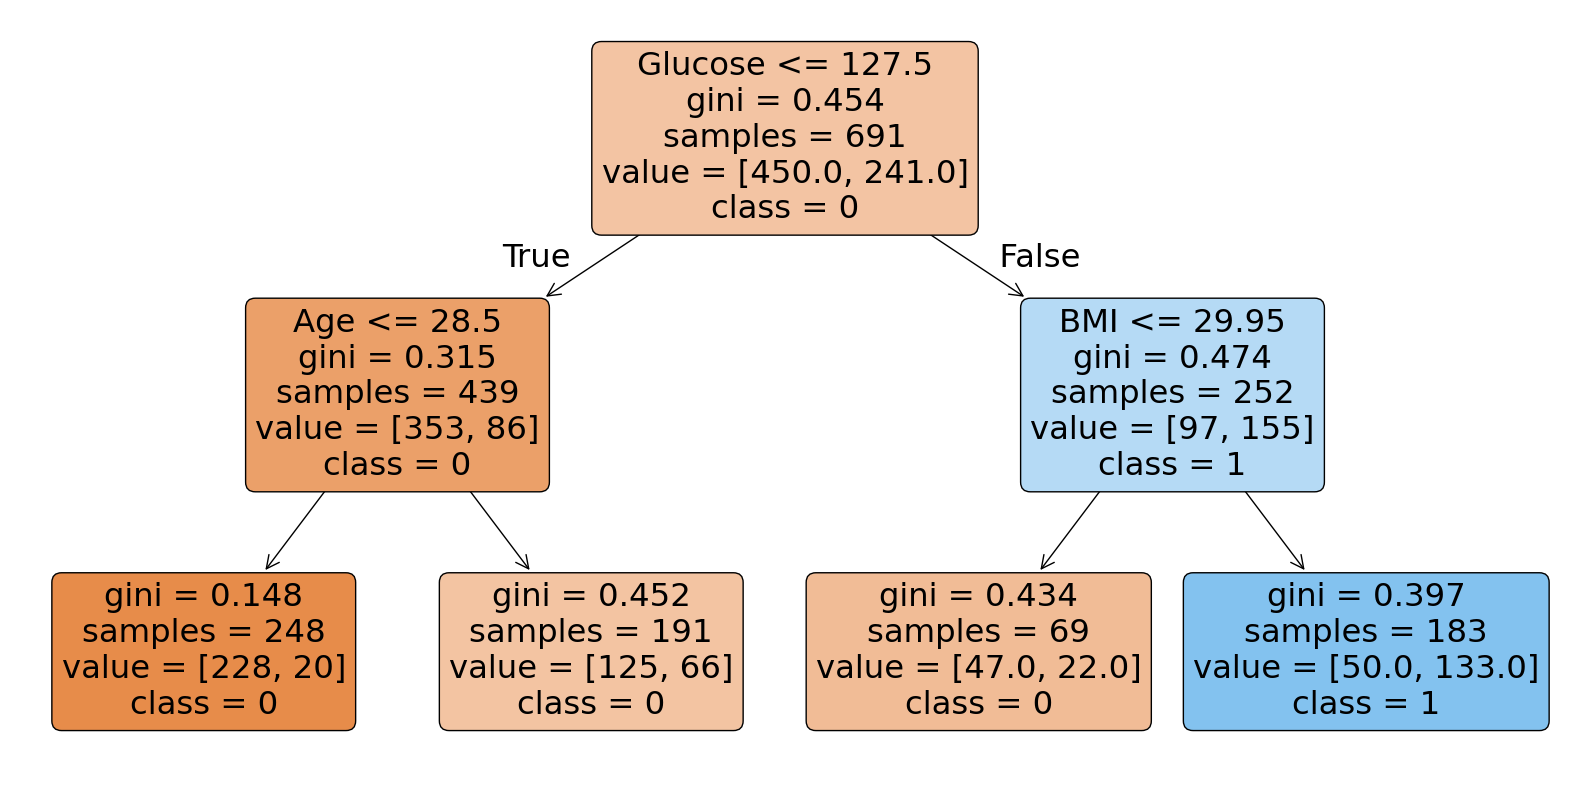

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Ajusta o tamanho da figura para uma visualização
plot_tree(modelo_dtc, 
          feature_names=X_train.columns,  # Nomes das características (opcional)
          class_names=modelo_dtc.classes_.astype(str),  # Nomes das classes (opcional)
          filled=True,  # Colore os nós para melhor interpretação
          rounded=True)  # Arredonda os nós para uma visualização mais amigável
plt.show()


## Improving the performance of a Decision Tree

#### Activity 6.  

* Fit the decision tree classifier to the training set from Activity 1, but now limit the maximum depth of the learned tree. Instantiate the `DecisionTreeClassifier` class and pass the parameter `max_depth=3`.

In [107]:
modelo_dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_dtc.fit(X_train, y_train)

# Faz previsões com o modelo Random Forest
y_pred_dtc = modelo_dtc.predict(X_test)

print(y_pred_dtc)

[0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0]


#### Activity 7.  

* Print the training accuracy
* Print the test set accuracy
* Print the confusion matrix of the test set
* Print the test set precision
* Print the test set recall
* Print the test set f1 score


In [110]:
# Calcula a acurácia no conjunto de treino
train_accuracy = modelo_dtc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calcula a acurácia no conjunto de teste
test_accuracy = modelo_dtc.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Previsões no conjunto de teste
y_pred = modelo_dtc.predict(X_test)

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calcula a precisão no conjunto de teste
test_precision = precision_score(y_test, y_pred, average='weighted')
print("Test Precision:", test_precision)

# Calcula o recall no conjunto de teste
test_recall = recall_score(y_test, y_pred, average='weighted')
print("Test Recall:", test_recall)

# Calcula o F1 Score no conjunto de teste
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test F1 Score:", test_f1)

Training Accuracy: 0.7727930535455861
Test Accuracy: 0.7792207792207793
Confusion Matrix:
 [[42  8]
 [ 9 18]]
Test Precision: 0.7775166010460127
Test Recall: 0.7792207792207793
Test F1 Score: 0.7782309228227405


### Activity 8.

Plot the learned Decision Tree with matplotlib. The decision tree can be visualized from the `sklearn.tree` library with the `plot_tree` method.

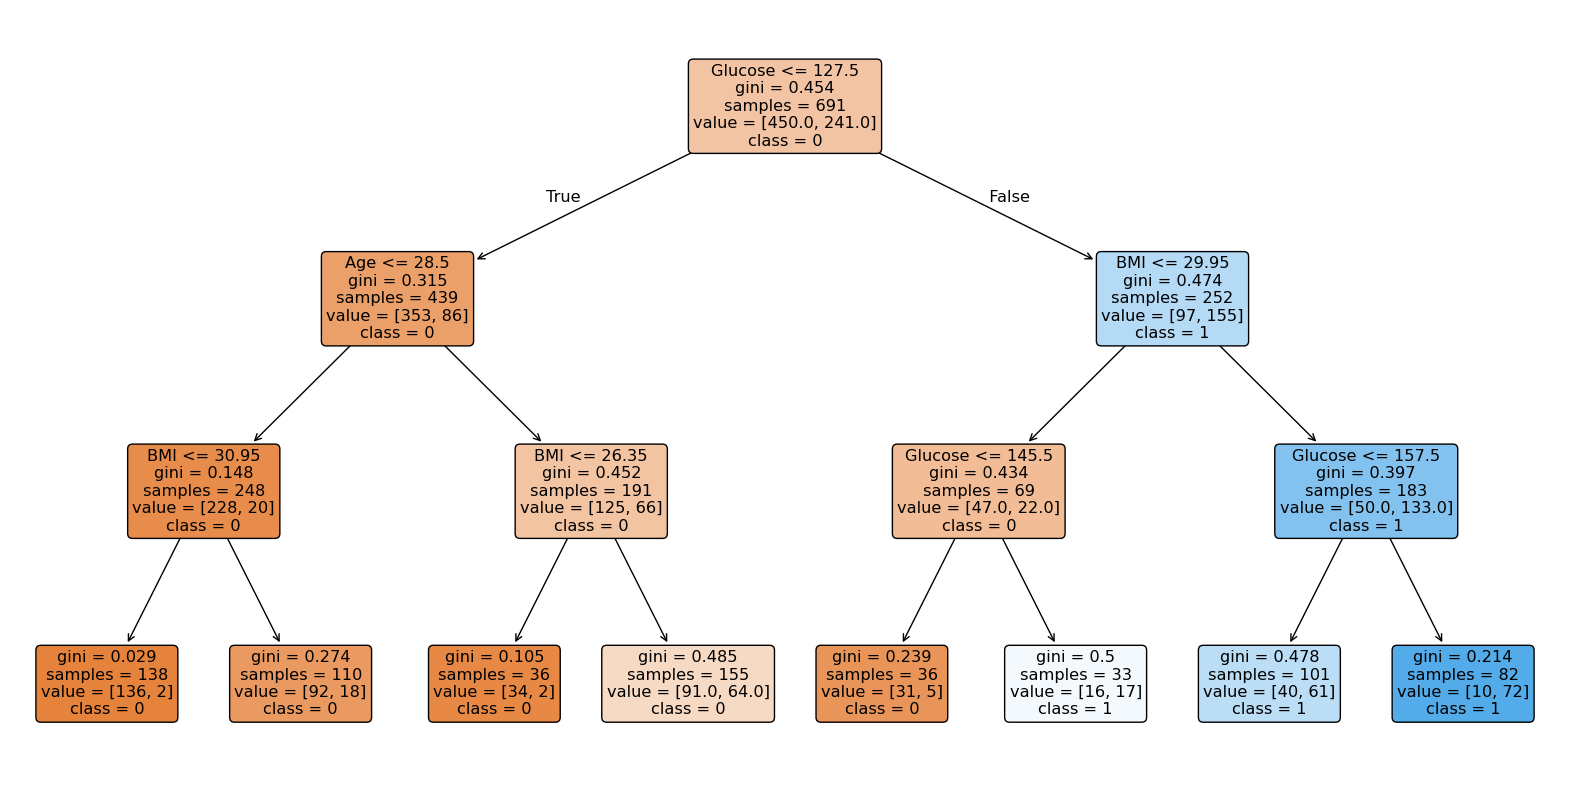

In [113]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Ajusta o tamanho da figura para uma visualização
plot_tree(modelo_dtc, 
          feature_names=X_train.columns,  # Nomes das características (opcional)
          class_names=modelo_dtc.classes_.astype(str),  # Nomes das classes (opcional)
          filled=True,  # Colore os nós para melhor interpretação
          rounded=True)  # Arredonda os nós para uma visualização mais amigável
plt.show()


### Activity 9.

Test different values of `max_depth` and try to find the best value.

In [134]:
modelo_dtc = DecisionTreeClassifier(max_depth=50, random_state=42)
modelo_dtc.fit(X_train, y_train)

# Faz previsões com o modelo Random Forest
y_pred_dtc = modelo_dtc.predict(X_test)

print(y_pred_dtc)

[1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0]


In [136]:
# Calcula a acurácia no conjunto de treino
train_accuracy = modelo_dtc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calcula a acurácia no conjunto de teste
test_accuracy = modelo_dtc.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Previsões no conjunto de teste
y_pred = modelo_dtc.predict(X_test)

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calcula a precisão no conjunto de teste
test_precision = precision_score(y_test, y_pred, average='weighted')
print("Test Precision:", test_precision)

# Calcula o recall no conjunto de teste
test_recall = recall_score(y_test, y_pred, average='weighted')
print("Test Recall:", test_recall)

# Calcula o F1 Score no conjunto de teste
test_f1 = f1_score(y_test, y_pred, average='weighted')
print("Test F1 Score:", test_f1)

Training Accuracy: 1.0
Test Accuracy: 0.7922077922077922
Confusion Matrix:
 [[41  9]
 [ 7 20]]
Test Precision: 0.7964808180325421
Test Recall: 0.7922077922077922
Test F1 Score: 0.7937980386959979


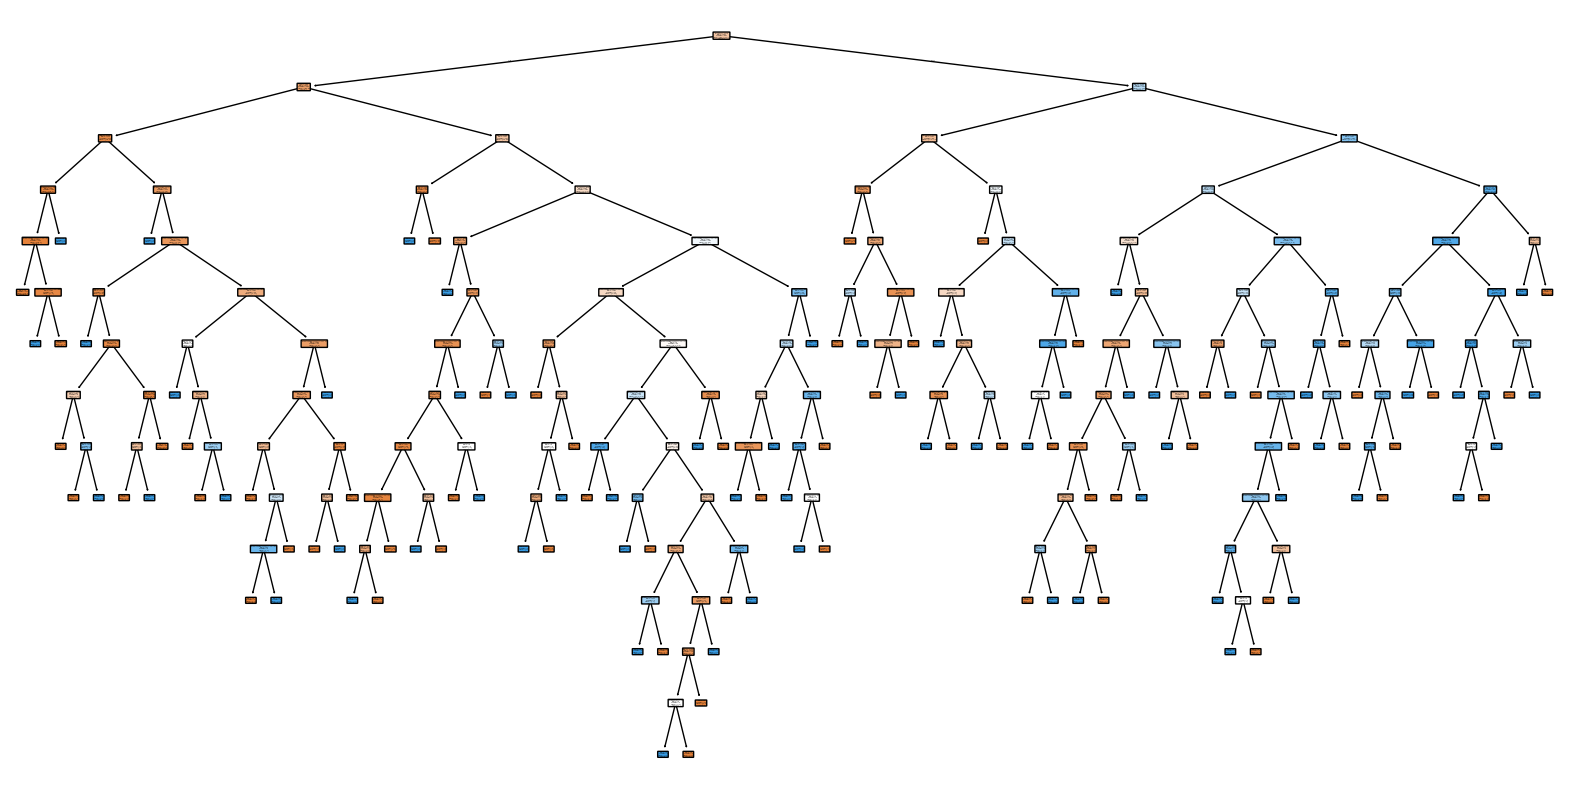

In [139]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Ajusta o tamanho da figura para uma visualização
plot_tree(modelo_dtc, 
          feature_names=X_train.columns,  # Nomes das características (opcional)
          class_names=modelo_dtc.classes_.astype(str),  # Nomes das classes (opcional)
          filled=True,  # Colore os nós para melhor interpretação
          rounded=True)  # Arredonda os nós para uma visualização mais amigável
plt.show()


In [132]:
from sklearn.tree import export_text

# Exibe a árvore de decisão como texto
tree_text = export_text(modelo_dtc, feature_names=list(X_train.columns))
#print(tree_text)


|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|